In [ ]:
from google.colab import files
uploaded = files.upload()

Saving korea_e_with_topics.csv to korea_e_with_topics.csv
Saving korea_g_with_topics.csv to korea_g_with_topics.csv
Saving korea_s_with_topics.csv to korea_s_with_topics.csv
Saving uk_e_with_topics.csv to uk_e_with_topics.csv
Saving uk_g_with_topics.csv to uk_g_with_topics.csv
Saving uk_s_with_topics.csv to uk_s_with_topics.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# 1. 모든 파일 로드 & 합치기
korean_e = pd.read_csv('korea_e_with_topics.csv')
korean_s = pd.read_csv('korea_s_with_topics.csv')
korean_g = pd.read_csv('korea_g_with_topics.csv')

uk_e = pd.read_csv('uk_e_with_topics.csv')
uk_s = pd.read_csv('uk_s_with_topics.csv')
uk_g = pd.read_csv('uk_g_with_topics.csv')

# 카테고리 컬럼 확인 (이미 있을 수도)
korean_e['esg_category'] = 'E'
korean_s['esg_category'] = 'S'
korean_g['esg_category'] = 'G'

uk_e['esg_category'] = 'E'
uk_s['esg_category'] = 'S'
uk_g['esg_category'] = 'G'

# 합치기
korean_df = pd.concat([korean_e, korean_s, korean_g], ignore_index=True)
uk_df = pd.concat([uk_e, uk_s, uk_g], ignore_index=True)

print(f"✅ Korean total: {len(korean_df):,} articles")
print(f"   - E: {len(korean_e):,}, S: {len(korean_s):,}, G: {len(korean_g):,}")
print(f"✅ UK total: {len(uk_df):,} articles")
print(f"   - E: {len(uk_e):,}, S: {len(uk_s):,}, G: {len(uk_g):,}")

✅ Korean total: 2,999 articles
   - E: 1,360, S: 555, G: 1,084
✅ UK total: 6,421 articles
   - E: 5,944, S: 336, G: 141


In [ ]:
# 기본 정보 확인
print("=" * 70)
print("📊 DATA OVERVIEW")
print("=" * 70)
print(f"Korean articles: {len(korean_df):,}")
print(f"UK articles: {len(uk_df):,}")
print(f"\nKorean topics: {korean_df['topic'].nunique()} unique topics")
print(f"UK topics: {uk_df['topic'].nunique()} unique topics")
print(f"\nDate range: {korean_df['date'].min()} to {korean_df['date'].max()}")
print("=" * 70)

# 토픽 분포 확인
print("\n📈 TOP 10 TOPICS (Korean)")
print(korean_df['topic'].value_counts().head(10))
print("\n📈 TOP 10 TOPICS (UK)")
print(uk_df['topic'].value_counts().head(10))

📊 DATA OVERVIEW
Korean articles: 2,999
UK articles: 6,421

Korean topics: 29 unique topics
UK topics: 60 unique topics

Date range: 2023-01-01 to 2024-12-31

📈 TOP 10 TOPICS (Korean)
topic
BERTopic(calculate_probabilities=True, ctfidf_model=ClassTfidfTransformer(...), embedding_model=<bertopic.backend._sentencetransformers.SentenceTransformerBackend object at 0x7bfef569a0c0>, hdbscan_model=HDBSCAN(...), language=None, low_memory=False, min_topic_size=15, n_gram_range=(1, 1), nr_topics=auto, representation_model=None, seed_topic_list=None, top_n_words=10, umap_model=UMAP(...), vectorizer_model=CountVectorizer(...), verbose=True, zeroshot_min_similarity=0.7, zeroshot_topic_list=None)    1360
-1                                                                                                                                                                                                                                                                                                           

In [ ]:
# 토픽 컬럼 타입 확인
print("Korean topic column type:")
print(type(korean_df['topic'].iloc[0]))
print("\nKorean topic unique values (first 20):")
print(korean_df['topic'].unique()[:20])

print("\n" + "="*70)
print("UK topic column type:")
print(type(uk_df['topic'].iloc[0]))
print("\nUK topic unique values (first 20):")
print(uk_df['topic'].unique()[:20])

Korean topic column type:
<class 'str'>

Korean topic unique values (first 20):
['BERTopic(calculate_probabilities=True, ctfidf_model=ClassTfidfTransformer(...), embedding_model=<bertopic.backend._sentencetransformers.SentenceTransformerBackend object at 0x7bfef569a0c0>, hdbscan_model=HDBSCAN(...), language=None, low_memory=False, min_topic_size=15, n_gram_range=(1, 1), nr_topics=auto, representation_model=None, seed_topic_list=None, top_n_words=10, umap_model=UMAP(...), vectorizer_model=CountVectorizer(...), verbose=True, zeroshot_min_similarity=0.7, zeroshot_topic_list=None)'
 0 -1 2 3 5 1 4 10 22 24 21 23 7 6 19 14 13 8 18]

UK topic column type:
<class 'numpy.int64'>

UK topic unique values (first 20):
[ 4 -1  9 37 34 18 31 19 42  5 29 13 44  3 46  0 28  1 54 38]


In [ ]:
print("="*70)
print("🔧 CLEANING KOREAN TOPIC COLUMN")
print("="*70)

# 원본 상태 확인
print(f"Original dtype: {korean_df['topic'].dtype}")
print(f"First 5 values: {korean_df['topic'].head().tolist()}")

# 클리닝 함수
def clean_topic(value):
    """BERTopic 객체 문자열을 -1로, 나머지는 정수로"""
    value_str = str(value)
    if 'BERTopic' in value_str:
        return -1
    try:
        return int(value_str)
    except:
        return -1

# 적용
korean_df['topic'] = korean_df['topic'].apply(clean_topic)

print(f"\n✅ Cleaned dtype: {korean_df['topic'].dtype}")
print(f"Unique topics: {korean_df['topic'].nunique()}")
print("="*70)

# 토픽 분포
print("\n📈 TOP 10 TOPICS (Korean - Cleaned)")
print(korean_df['topic'].value_counts().head(10))

# Outlier 비율
outlier_count = (korean_df['topic'] == -1).sum()
outlier_pct = outlier_count / len(korean_df) * 100
print(f"\n🔍 Outliers: {outlier_count:,} ({outlier_pct:.1f}%)")
print("="*70)

🔧 CLEANING KOREAN TOPIC COLUMN
Original dtype: Int64
First 5 values: [-1, -1, -1, -1, -1]

✅ Cleaned dtype: int64
Unique topics: 28

📈 TOP 10 TOPICS (Korean - Cleaned)
topic
-1    1862
 0     350
 1     226
 2      95
 3      91
 4      56
 5      48
 6      24
 7      22
 8      20
Name: count, dtype: int64

🔍 Outliers: 1,862 (62.1%)


In [ ]:
# Top 10 토픽 (outlier 제외)
korean_top10 = korean_df[korean_df['topic'] != -1]['topic'].value_counts().head(10).index
uk_top10 = uk_df[uk_df['topic'] != -1]['topic'].value_counts().head(10).index

print(f"\n🎯 Korean Top 10: {list(korean_top10)}")
print(f"🎯 UK Top 10: {list(uk_top10)}")

# 월별 계산
korean_temporal = korean_df[korean_df['topic'].isin(korean_top10)].groupby(
    ['year_month', 'topic']
).size().unstack(fill_value=0)

print(f"\n✅ Ready for temporal analysis!")
print(f"Shape: {korean_temporal.shape}")


🎯 Korean Top 10: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
🎯 UK Top 10: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]

✅ Ready for temporal analysis!
Shape: (24, 10)


In [ ]:
# 토픽 분포 다시 확인 (outlier 제외)
print("="*70)
print("📊 TOPIC DISTRIBUTION CHECK")
print("="*70)

print("\nKorean (excluding -1):")
korean_dist = korean_df[korean_df['topic'] != -1]['topic'].value_counts()
print(korean_dist.head(15))

print("\nUK (excluding -1):")
uk_dist = uk_df[uk_df['topic'] != -1]['topic'].value_counts()
print(uk_dist.head(15))

print("="*70)

📊 TOPIC DISTRIBUTION CHECK

Korean (excluding -1):
topic
0     350
1     226
2      95
3      91
4      56
5      48
6      24
7      22
8      20
9      19
10     19
11     18
12     18
13     17
14     16
Name: count, dtype: int64

UK (excluding -1):
topic
0     394
1     266
2     195
3     184
4     179
5     171
6     147
7     115
8     102
9      98
10     96
11     92
12     84
13     82
14     81
Name: count, dtype: Int64


✅ Percentage data prepared!
Korean: (24, 10)
UK: (24, 10)


/tmp/ipython-input-159362131.py:61: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-159362131.py:61: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-159362131.py:61: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-159362131.py:61: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-159362131.py:61: UserWarning: Glyph 51596 (\N{HANGUL SYLLABLE JEUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-159362131.py:62: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  plt.savefig('temporal_top10_topics.png', dpi=300, bbox_inches='tight')
/tmp/ipython-input-159362131.py:62: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing f

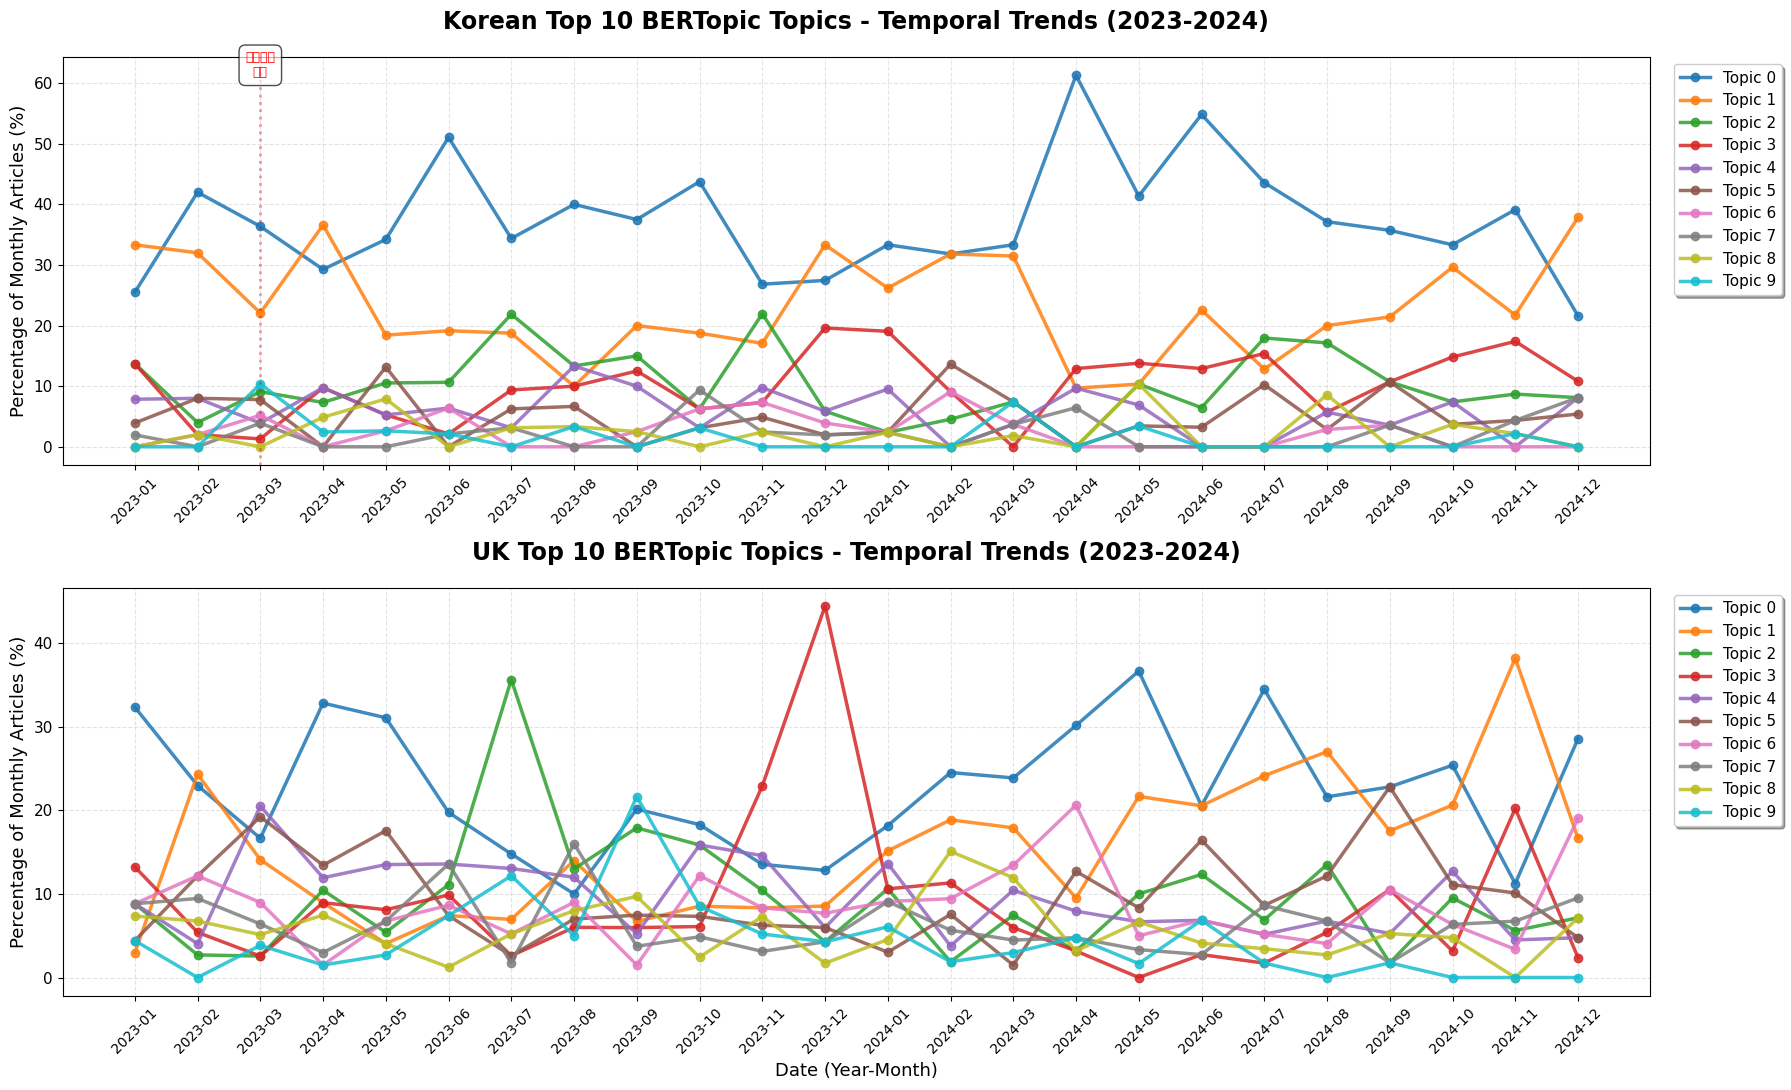


✅ Saved: temporal_top10_topics.png


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# UK도 계산
uk_temporal = uk_df[uk_df['topic'].isin(uk_top10)].groupby(
    ['year_month', 'topic']
).size().unstack(fill_value=0)

# 비율로 변환
korean_temporal_pct = korean_temporal.div(korean_temporal.sum(axis=1), axis=0) * 100
uk_temporal_pct = uk_temporal.div(uk_temporal.sum(axis=1), axis=0) * 100

print("✅ Percentage data prepared!")
print(f"Korean: {korean_temporal_pct.shape}")
print(f"UK: {uk_temporal_pct.shape}")

# 시각화
fig, axes = plt.subplots(2, 1, figsize=(18, 11))

# Korean
for topic in korean_top10:
    axes[0].plot(korean_temporal_pct.index.astype(str),
                 korean_temporal_pct[topic],
                 marker='o', linewidth=2.5, markersize=6, alpha=0.85, label=f'Topic {topic}')

axes[0].set_title('Korean Top 10 BERTopic Topics - Temporal Trends (2023-2024)',
                  fontsize=17, fontweight='bold', pad=20)
axes[0].set_ylabel('Percentage of Monthly Articles (%)', fontsize=13)
axes[0].legend(bbox_to_anchor=(1.01, 1), loc='upper left', ncol=1, fontsize=11,
               frameon=True, shadow=True)
axes[0].grid(True, alpha=0.35, linestyle='--', linewidth=0.8)
axes[0].tick_params(axis='x', rotation=45, labelsize=10)
axes[0].tick_params(axis='y', labelsize=11)

# 주주총회 시즌 표시 (한국 3월)
march_idx = 2  # 2023-03
axes[0].axvline(x=march_idx, color='red', linestyle=':', alpha=0.4, linewidth=2)
axes[0].text(march_idx, axes[0].get_ylim()[1]*0.95,
             '주주총회\n시즌', ha='center', fontsize=9, color='red',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.7))

# UK
for topic in uk_top10:
    axes[1].plot(uk_temporal_pct.index.astype(str),
                 uk_temporal_pct[topic],
                 marker='o', linewidth=2.5, markersize=6, alpha=0.85, label=f'Topic {topic}')

axes[1].set_title('UK Top 10 BERTopic Topics - Temporal Trends (2023-2024)',
                  fontsize=17, fontweight='bold', pad=20)
axes[1].set_ylabel('Percentage of Monthly Articles (%)', fontsize=13)
axes[1].set_xlabel('Date (Year-Month)', fontsize=13)
axes[1].legend(bbox_to_anchor=(1.01, 1), loc='upper left', ncol=1, fontsize=11,
               frameon=True, shadow=True)
axes[1].grid(True, alpha=0.35, linestyle='--', linewidth=0.8)
axes[1].tick_params(axis='x', rotation=45, labelsize=10)
axes[1].tick_params(axis='y', labelsize=11)

plt.tight_layout()
plt.savefig('temporal_top10_topics.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Saved: temporal_top10_topics.png")


📊 TOPIC VOLATILITY ANALYSIS

🇰🇷 Korean - Most Volatile Topics:
  Topic 0: σ = 9.23%
  Topic 1: σ = 8.45%
  Topic 2: σ = 5.69%
  Topic 3: σ = 5.51%
  Topic 5: σ = 3.96%

🇰🇷 Korean - Most Stable Topics:
  Topic 4: σ = 3.70%
  Topic 8: σ = 2.98%
  Topic 6: σ = 2.77%
  Topic 7: σ = 2.72%
  Topic 9: σ = 2.64%

🇬🇧 UK - Most Volatile Topics:
  Topic 3: σ = 9.40%
  Topic 1: σ = 8.46%
  Topic 0: σ = 7.62%
  Topic 2: σ = 7.12%
  Topic 5: σ = 5.43%

🇬🇧 UK - Most Stable Topics:
  Topic 9: σ = 4.81%
  Topic 6: σ = 4.69%
  Topic 4: σ = 4.55%
  Topic 7: σ = 3.55%
  Topic 8: σ = 3.42%


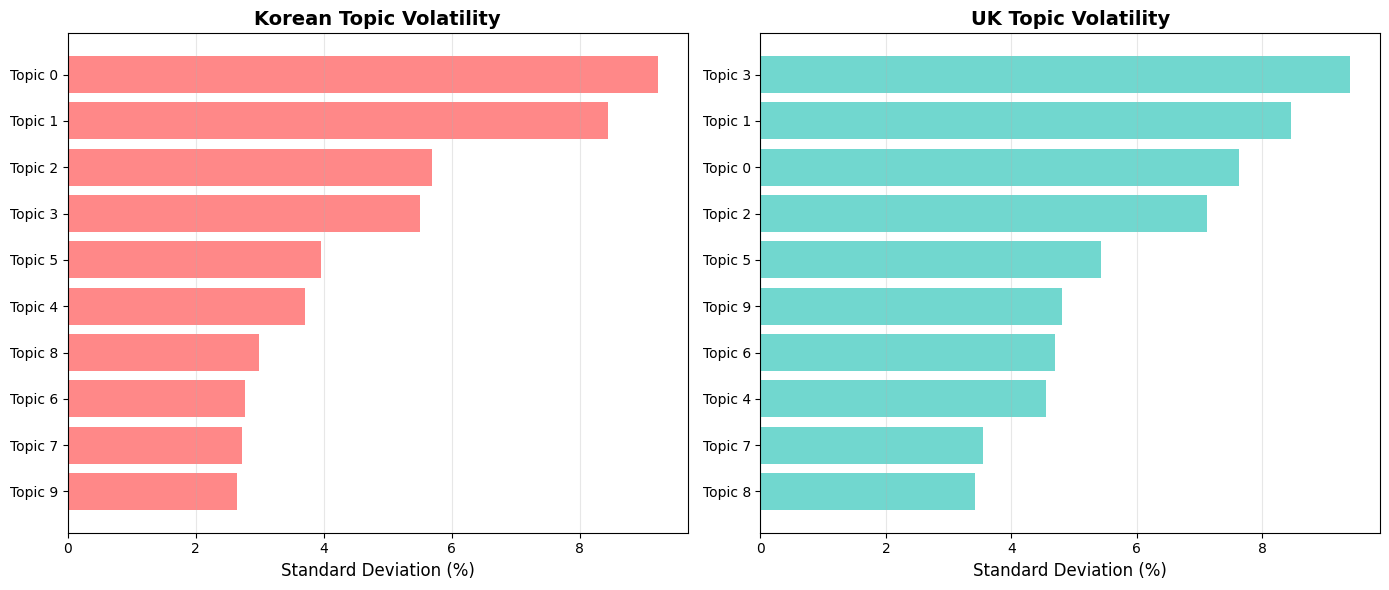


✅ Saved: topic_volatility.png


In [ ]:
# 각 토픽의 시간에 따른 변동성
print("\n" + "="*70)
print("📊 TOPIC VOLATILITY ANALYSIS")
print("="*70)

korean_volatility = korean_temporal_pct.std().sort_values(ascending=False)
uk_volatility = uk_temporal_pct.std().sort_values(ascending=False)

print("\n🇰🇷 Korean - Most Volatile Topics:")
for topic in korean_volatility.head(5).index:
    print(f"  Topic {topic}: σ = {korean_volatility[topic]:.2f}%")

print("\n🇰🇷 Korean - Most Stable Topics:")
for topic in korean_volatility.tail(5).index:
    print(f"  Topic {topic}: σ = {korean_volatility[topic]:.2f}%")

print("\n🇬🇧 UK - Most Volatile Topics:")
for topic in uk_volatility.head(5).index:
    print(f"  Topic {topic}: σ = {uk_volatility[topic]:.2f}%")

print("\n🇬🇧 UK - Most Stable Topics:")
for topic in uk_volatility.tail(5).index:
    print(f"  Topic {topic}: σ = {uk_volatility[topic]:.2f}%")

print("="*70)

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].barh(range(len(korean_volatility)), korean_volatility.values, color='#FF6B6B', alpha=0.8)
axes[0].set_yticks(range(len(korean_volatility)))
axes[0].set_yticklabels([f'Topic {t}' for t in korean_volatility.index])
axes[0].set_xlabel('Standard Deviation (%)', fontsize=12)
axes[0].set_title('Korean Topic Volatility', fontsize=14, fontweight='bold')
axes[0].grid(True, axis='x', alpha=0.3)
axes[0].invert_yaxis()

axes[1].barh(range(len(uk_volatility)), uk_volatility.values, color='#4ECDC4', alpha=0.8)
axes[1].set_yticks(range(len(uk_volatility)))
axes[1].set_yticklabels([f'Topic {t}' for t in uk_volatility.index])
axes[1].set_xlabel('Standard Deviation (%)', fontsize=12)
axes[1].set_title('UK Topic Volatility', fontsize=14, fontweight='bold')
axes[1].grid(True, axis='x', alpha=0.3)
axes[1].invert_yaxis()

plt.tight_layout()
plt.savefig('topic_volatility.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Saved: topic_volatility.png")

In [ ]:
# 비교 분석 정리
print("="*70)
print("🌍 KOREAN vs UK COMPARISON")
print("="*70)

# 1. 토픽 집중도
korean_top2_avg = korean_temporal_pct[[0, 1]].sum(axis=1).mean()
uk_top2_avg = uk_temporal_pct[[0, 1]].sum(axis=1).mean()

print(f"\n📊 Topic Concentration (Top 2 topics average share):")
print(f"  Korean: {korean_top2_avg:.1f}%")
print(f"  UK: {uk_top2_avg:.1f}%")
print(f"  → Korean is {'MORE' if korean_top2_avg > uk_top2_avg else 'LESS'} concentrated")

# 2. 전체 변동성
korean_avg_volatility = korean_temporal_pct.std().mean()
uk_avg_volatility = uk_temporal_pct.std().mean()

print(f"\n📈 Average Topic Volatility:")
print(f"  Korean: {korean_avg_volatility:.2f}%")
print(f"  UK: {uk_avg_volatility:.2f}%")
print(f"  → UK is {(uk_avg_volatility/korean_avg_volatility - 1)*100:.1f}% more volatile")

# 3. 토픽 다양성 (Shannon entropy)
from scipy.stats import entropy

korean_diversity = []
uk_diversity = []

for idx in korean_temporal_pct.index:
    korean_diversity.append(entropy(korean_temporal_pct.loc[idx]))
    uk_diversity.append(entropy(uk_temporal_pct.loc[idx]))

print(f"\n🎨 Topic Diversity (average entropy):")
print(f"  Korean: {np.mean(korean_diversity):.2f}")
print(f"  UK: {np.mean(uk_diversity):.2f}")
print(f"  → UK coverage is {'MORE' if np.mean(uk_diversity) > np.mean(korean_diversity) else 'LESS'} diverse")

print("="*70)

🌍 KOREAN vs UK COMPARISON

📊 Topic Concentration (Top 2 topics average share):
  Korean: 60.4%
  UK: 37.8%
  → Korean is MORE concentrated

📈 Average Topic Volatility:
  Korean: 4.77%
  UK: 5.90%
  → UK is 23.9% more volatile

🎨 Topic Diversity (average entropy):
  Korean: 1.65
  UK: 2.02
  → UK coverage is MORE diverse


In [ ]:
# Topic 0 샘플 기사 보기
print("\n🔍 What is Korean Topic 0?")
print("="*70)

topic0_articles = korean_df[korean_df['topic'] == 0].sort_values('topic_prob', ascending=False)

print(f"Total articles: {len(topic0_articles)}")
print(f"\nTop 10 titles:")
for i, row in topic0_articles.head(10).iterrows():
    print(f"  - {row['title'][:80]}...")

# ESG 분포
print(f"\nESG distribution in Topic 0:")
print(topic0_articles['esg_category'].value_counts())

# 시간적 분포
print(f"\nMonthly distribution:")
print(topic0_articles.groupby('year_month').size().sort_values(ascending=False).head(5))


🔍 What is Korean Topic 0?
Total articles: 350

Top 10 titles:
  - 신한은행, 창업진흥원과 업무협약 체결...
  - 한국제약협동조합, 법무법인 지평과 회원사 ESG 경영 지원 맞손...
  - 고려아연, 제3차 지속가능경영위원회 개최...
  - 중소 중견기업 CEO "ESG 도입 관심 크지만 인력 정보 예산 부족이 과제”...
  - "삼성전자가 밸류업 공시한다면 증시 활성화 큰 도움"...
  - 리싸이클오피스, 사용 후 버려지는 집기 재순환으로 ESG 경영 강화...
  - 의정부시청소년재단, ESG 경영 실천 선언문 선포...
  - 하나저축은행, '애 낳는 대한민국' 자녀양육 부모는 우대 금리...
  - 중기중앙회, ‘중소기업 ESG경영 우수사례집’ 발간...
  - 법무법인 화우, 김정남 前 삼정KPMG 상무 영입 "ESG 자문역량 강화"...

ESG distribution in Topic 0:
esg_category
G    203
S    147
Name: count, dtype: int64

Monthly distribution:
year_month
2023-03    28
2023-06    24
2023-02    21
2024-04    19
2024-03    18
dtype: int64


In [ ]:
print("\n🔍 What happened in UK Topic 3 (Dec 2023)?")
print("="*70)

# 2023-12의 Topic 3 기사들
topic3_dec = uk_df[(uk_df['topic'] == 3) & (uk_df['year_month'] == '2023-12')]

print(f"Topic 3 articles in Dec 2023: {len(topic3_dec)}")
print(f"\nSample titles:")
for i, row in topic3_dec.head(10).iterrows():
    print(f"  - {row['title'][:80]}...")

# ESG 분포
print(f"\nESG category:")
print(topic3_dec['esg_category'].value_counts())


🔍 What happened in UK Topic 3 (Dec 2023)?
Topic 3 articles in Dec 2023: 52

Sample titles:
  - Good Cop, bad Cop: what the Cop28 agreement says and what it means...
  - Cop28 agreement is progress – but there is still plenty of wriggle room for any ...
  - Cop28 has finally named fossil fuels as the main climate problem. But do leaders...
  - ‘Magical’ tech innovations a distraction from real solutions, climate experts wa...
  - Cop28: second draft text of climate deal calls for ‘transitioning away’ from fos...
  - Cop28’s winners and losers: from fossil fuel firms to future generations...
  - The Cop28 president told a shocking lie about fossil fuels – and he’s wrong abou...
  - Chris Bowen says agreement on global fossil fuel phase out central to Australia’...
  - Cop28 president says his firm will keep investing in oil...
  - Cop28 landmark deal agreed to ‘transition away’ from fossil fuels...

ESG category:
esg_category
E    48
S     4
Name: count, dtype: int64


In [ ]:
# 급등/급락 토픽 찾기
print("="*70)
print("🚀 TOPICS WITH DRAMATIC CHANGES")
print("="*70)

# 각 토픽의 최대값-최소값 차이
korean_range = korean_temporal_pct.max() - korean_temporal_pct.min()
uk_range = uk_temporal_pct.max() - uk_temporal_pct.min()

print("\n🇰🇷 Korean - Biggest movers:")
for topic in korean_range.sort_values(ascending=False).head(5).index:
    min_val = korean_temporal_pct[topic].min()
    max_val = korean_temporal_pct[topic].max()
    min_month = korean_temporal_pct[topic].idxmin()
    max_month = korean_temporal_pct[topic].idxmax()

    print(f"\n  Topic {topic}:")
    print(f"    Range: {min_val:.1f}% → {max_val:.1f}% (Δ{max_val-min_val:.1f}%)")
    print(f"    Peak: {max_month} ({max_val:.1f}%)")
    print(f"    Low: {min_month} ({min_val:.1f}%)")

print("\n🇬🇧 UK - Biggest movers:")
for topic in uk_range.sort_values(ascending=False).head(5).index:
    min_val = uk_temporal_pct[topic].min()
    max_val = uk_temporal_pct[topic].max()
    min_month = uk_temporal_pct[topic].idxmin()
    max_month = uk_temporal_pct[topic].idxmax()

    print(f"\n  Topic {topic}:")
    print(f"    Range: {min_val:.1f}% → {max_val:.1f}% (Δ{max_val-min_val:.1f}%)")
    print(f"    Peak: {max_month} ({max_val:.1f}%)")
    print(f"    Low: {min_month} ({min_val:.1f}%)")

🚀 TOPICS WITH DRAMATIC CHANGES

🇰🇷 Korean - Biggest movers:

  Topic 0:
    Range: 21.6% → 61.3% (Δ39.7%)
    Peak: 2024-04 (61.3%)
    Low: 2024-12 (21.6%)

  Topic 1:
    Range: 9.7% → 37.8% (Δ28.2%)
    Peak: 2024-12 (37.8%)
    Low: 2024-04 (9.7%)

  Topic 2:
    Range: 0.0% → 22.0% (Δ22.0%)
    Peak: 2023-11 (22.0%)
    Low: 2024-04 (0.0%)

  Topic 3:
    Range: 0.0% → 19.6% (Δ19.6%)
    Peak: 2023-12 (19.6%)
    Low: 2024-03 (0.0%)

  Topic 5:
    Range: 0.0% → 13.6% (Δ13.6%)
    Peak: 2024-02 (13.6%)
    Low: 2023-04 (0.0%)

🇬🇧 UK - Biggest movers:

  Topic 3:
    Range: 0.0% → 44.4% (Δ44.4%)
    Peak: 2023-12 (44.4%)
    Low: 2024-05 (0.0%)

  Topic 1:
    Range: 2.9% → 38.2% (Δ35.3%)
    Peak: 2024-11 (38.2%)
    Low: 2023-01 (2.9%)

  Topic 2:
    Range: 1.8% → 35.7% (Δ33.9%)
    Peak: 2023-07 (35.7%)
    Low: 2024-09 (1.8%)

  Topic 0:
    Range: 10.0% → 36.7% (Δ26.7%)
    Peak: 2024-05 (36.7%)
    Low: 2023-08 (10.0%)

  Topic 9:
    Range: 0.0% → 21.6% (Δ21.6%)
    Peak: 2

🇰🇷 Korean 핵심 발견:

Topic 0 ↔ Topic 1: 완벽한 반대!

Topic 0: 2024-04 peak (61%) → 2024-12 low (22%)
Topic 1: 2024-04 low (10%) → 2024-12 peak (38%)
→ 뭔가가 서로 대체하고 있어! 🔄


2023년 후반 이벤트들:

Topic 2: 2023-11 peak (22%)
Topic 3: 2023-12 peak (20%)

In [ ]:
# 급변한 토픽들의 정체 파악
print("="*70)
print("🔍 IDENTIFYING DRAMATIC TOPICS")
print("="*70)

# Korean 분석할 토픽들
korean_investigate = [
    (0, '2024-04', 61.3, 'Peak'),
    (0, '2024-12', 21.6, 'Low'),
    (1, '2024-12', 37.8, 'Peak'),
    (1, '2024-04', 9.7, 'Low'),
    (2, '2023-11', 22.0, 'Peak'),
    (3, '2023-12', 19.6, 'Peak'),
]

print("\n🇰🇷 KOREAN TOPICS:")
for topic, period, pct, label in korean_investigate:
    print(f"\n{'='*70}")
    print(f"📌 Topic {topic} @ {period} ({label}: {pct:.1f}%)")
    print('='*70)

    # 그 시기의 기사들
    period_articles = korean_df[(korean_df['topic'] == topic) &
                                (korean_df['year_month'] == period)]

    print(f"Articles: {len(period_articles)}")

    # ESG 분포
    esg_dist = period_articles['esg_category'].value_counts()
    print(f"ESG: {dict(esg_dist)}")

    # 제목으로 키워드 추출
    from collections import Counter
    import re

    all_titles = ' '.join(period_articles['title'].astype(str))
    words = re.findall(r'[가-힣]{2,}', all_titles)
    word_freq = Counter(words)

    stopwords = ['것으로', '있는', '했다', '밝혔다', '대한', '이번', '올해', '지난', '있다', '통해']
    filtered = [(w, c) for w, c in word_freq.most_common(30) if w not in stopwords]

    print(f"Keywords: {', '.join([f'{w}({c})' for w, c in filtered[:12]])}")

    # 샘플 제목 5개
    print(f"\nSample titles:")
    for i, title in enumerate(period_articles['title'].head(5), 1):
        print(f"  {i}. {title[:75]}...")

# UK 분석할 토픽들
uk_investigate = [
    (1, '2024-11', 38.2, 'Peak'),
    (2, '2023-07', 35.7, 'Peak'),
    (9, '2023-09', 21.6, 'Peak'),
    (0, '2024-05', 36.7, 'Peak'),
]

print("\n" + "="*70)
print("🇬🇧 UK TOPICS:")
for topic, period, pct, label in uk_investigate:
    print(f"\n{'='*70}")
    print(f"📌 Topic {topic} @ {period} ({label}: {pct:.1f}%)")
    print('='*70)

    period_articles = uk_df[(uk_df['topic'] == topic) &
                           (uk_df['year_month'] == period)]

    print(f"Articles: {len(period_articles)}")

    # ESG 분포
    esg_dist = period_articles['esg_category'].value_counts()
    print(f"ESG: {dict(esg_dist)}")

    # 키워드
    all_titles = ' '.join(period_articles['title'].astype(str)).lower()
    words = re.findall(r'\b[a-z]{3,}\b', all_titles)
    word_freq = Counter(words)

    stopwords_en = ['the', 'and', 'for', 'with', 'that', 'from', 'this', 'will',
                    'are', 'have', 'could', 'would', 'their', 'what', 'more']
    filtered = [(w, c) for w, c in word_freq.most_common(30) if w not in stopwords_en]

    print(f"Keywords: {', '.join([f'{w}({c})' for w, c in filtered[:12]])}")

    # 샘플 제목
    print(f"\nSample titles:")
    for i, title in enumerate(period_articles['title'].head(5), 1):
        print(f"  {i}. {title[:75]}...")

🔍 IDENTIFYING DRAMATIC TOPICS

🇰🇷 KOREAN TOPICS:

📌 Topic 0 @ 2024-04 (Peak: 61.3%)
Articles: 19
ESG: {'G': np.int64(13), 'S': np.int64(6)}
Keywords: 경영(6), 강화(5), 공정거래(2), 체결(2), 개최(2), 활성화(2), 역량(2), 위원회(2), 서울우유협동조합(1), 서울우유(1), 고객센터(1), 상생협력(1)

Sample titles:
  1. 서울우유협동조합-서울우유 고객센터, 공정거래 및 상생협력 협약 체결...
  2. 켐토피아, 中企 중대재해 대응 솔루션 출시...
  3. HL홀딩스 ‘2024년 협력사 동반성장 컨퍼런스’ 개최...
  4. 전국금융노조, 양산갑 이재영 후보 지지 선언...
  5. 지상에서도 선한 영향력 제주항공, 비행기도 행복도 띄웁니다...

📌 Topic 0 @ 2024-12 (Low: 21.6%)
Articles: 8
ESG: {'S': np.int64(5), 'G': np.int64(3)}
Keywords: 경영(3), 기능한국인에(1), 서문수(1), 오광진(1), 이윤희씨(1), 고려아연(1), 노조(1), 이학영(1), 국회부의장에(1), 적대적(1), 중지(1), 촉구(1)

Sample titles:
  1. 10~12월 기능한국인에 서문수 오광진 이윤희씨...
  2. 고려아연 노조, 이학영 국회부의장에 “MBK의 적대적 M&A 중지 촉구” 건의서 전달...
  3. DGB금융-원주시, 사회공헌 '맞손' 황병우 회장 "지역 소통 강화"...
  4. 서울시 복지재단 기업 단체, 외로움 없는 서울, 함께 만든다...
  5. 자립준비청년 사회 진출 돕는다 GS25, ‘해피스토어 1호점’ 오픈...

📌 Topic 1 @ 2024-12 (Peak: 37.8%)
Articles: 14
ESG: {'G': np.int64(9), 'S': np.int64(5)}
Keywords: 호텔롯데(

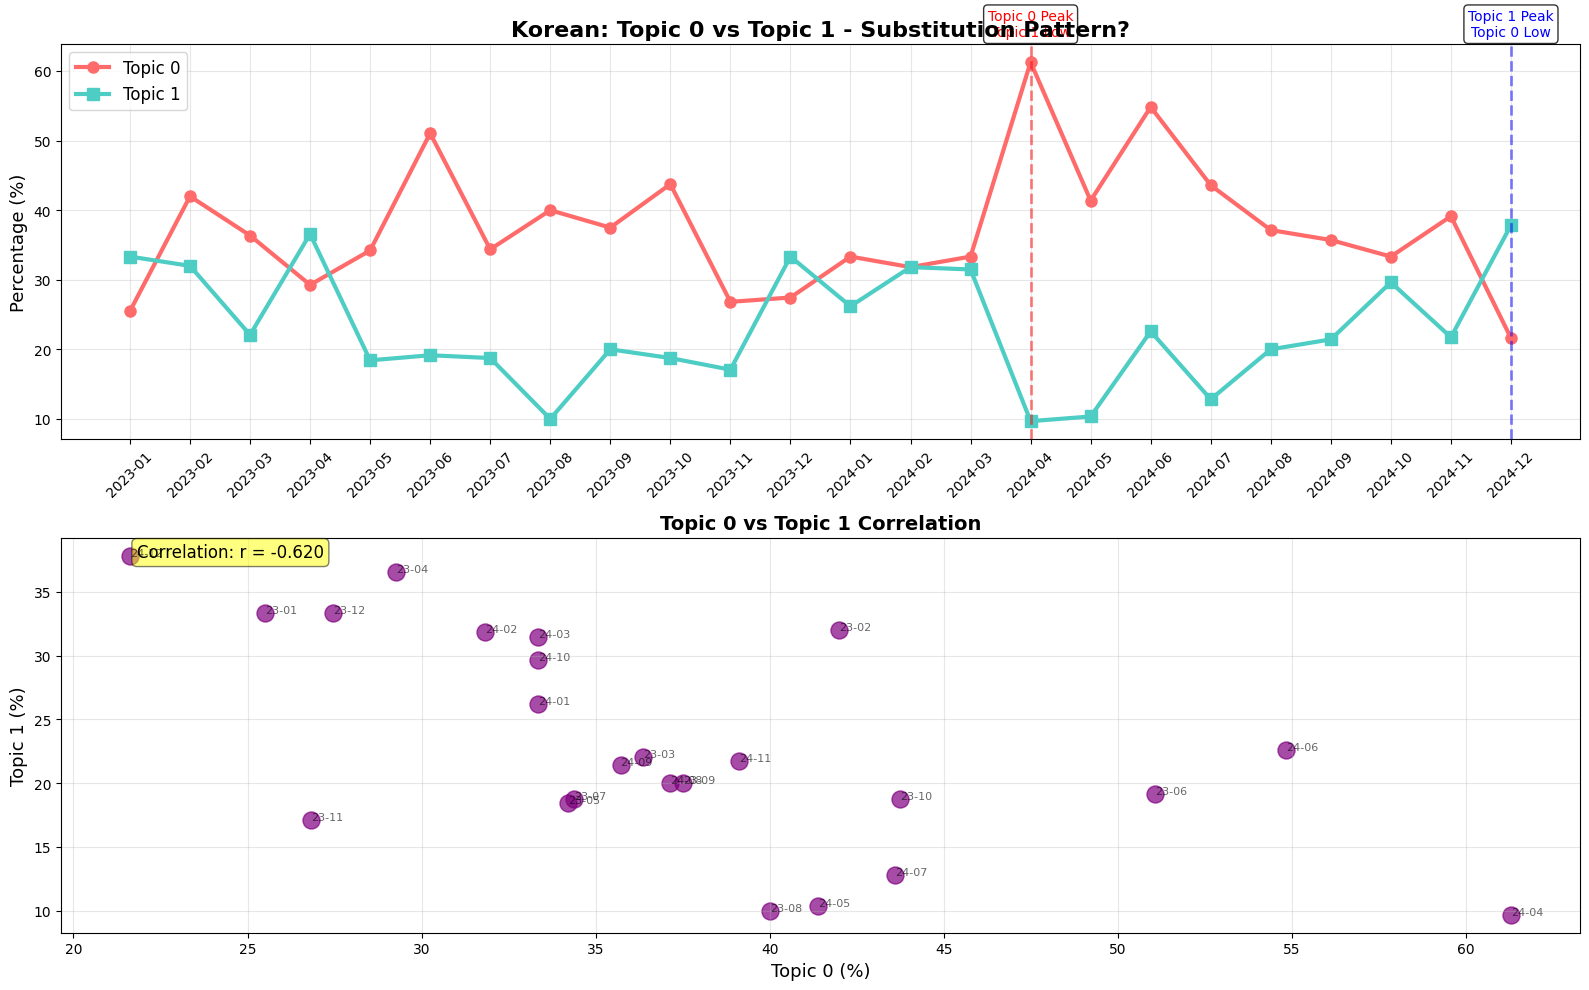


✅ Saved: korean_topic_0_vs_1_substitution.png
📊 Correlation: r = -0.620


In [ ]:
# Korean Topic 0 vs 1 비교
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# 시계열
axes[0].plot(korean_temporal_pct.index.astype(str), korean_temporal_pct[0],
             marker='o', linewidth=3, markersize=8, color='#FF6B6B', label='Topic 0')
axes[0].plot(korean_temporal_pct.index.astype(str), korean_temporal_pct[1],
             marker='s', linewidth=3, markersize=8, color='#4ECDC4', label='Topic 1')
axes[0].set_title('Korean: Topic 0 vs Topic 1 - Substitution Pattern?',
                  fontsize=16, fontweight='bold')
axes[0].set_ylabel('Percentage (%)', fontsize=13)
axes[0].legend(fontsize=12, loc='upper left')
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# 2024-04와 2024-12 하이라이트
axes[0].axvline(x='2024-04', color='red', linestyle='--', alpha=0.5, linewidth=2)
axes[0].axvline(x='2024-12', color='blue', linestyle='--', alpha=0.5, linewidth=2)
axes[0].text('2024-04', 65, 'Topic 0 Peak\nTopic 1 Low', ha='center',
             fontsize=10, color='red', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
axes[0].text('2024-12', 65, 'Topic 1 Peak\nTopic 0 Low', ha='center',
             fontsize=10, color='blue', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Scatter plot (correlation)
axes[1].scatter(korean_temporal_pct[0], korean_temporal_pct[1],
                s=150, alpha=0.7, color='purple')
axes[1].set_xlabel('Topic 0 (%)', fontsize=13)
axes[1].set_ylabel('Topic 1 (%)', fontsize=13)
axes[1].set_title('Topic 0 vs Topic 1 Correlation', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# 상관계수 표시
corr = korean_temporal_pct[[0, 1]].corr().iloc[0, 1]
axes[1].text(0.05, 0.95, f'Correlation: r = {corr:.3f}',
             transform=axes[1].transAxes, fontsize=12,
             bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

# 각 점에 월 레이블
for idx, row in korean_temporal_pct[[0, 1]].iterrows():
    axes[1].annotate(str(idx)[-5:], (row[0], row[1]),
                     fontsize=8, alpha=0.6)

plt.tight_layout()
plt.savefig('korean_topic_0_vs_1_substitution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n✅ Saved: korean_topic_0_vs_1_substitution.png")
print(f"📊 Correlation: r = {corr:.3f}")

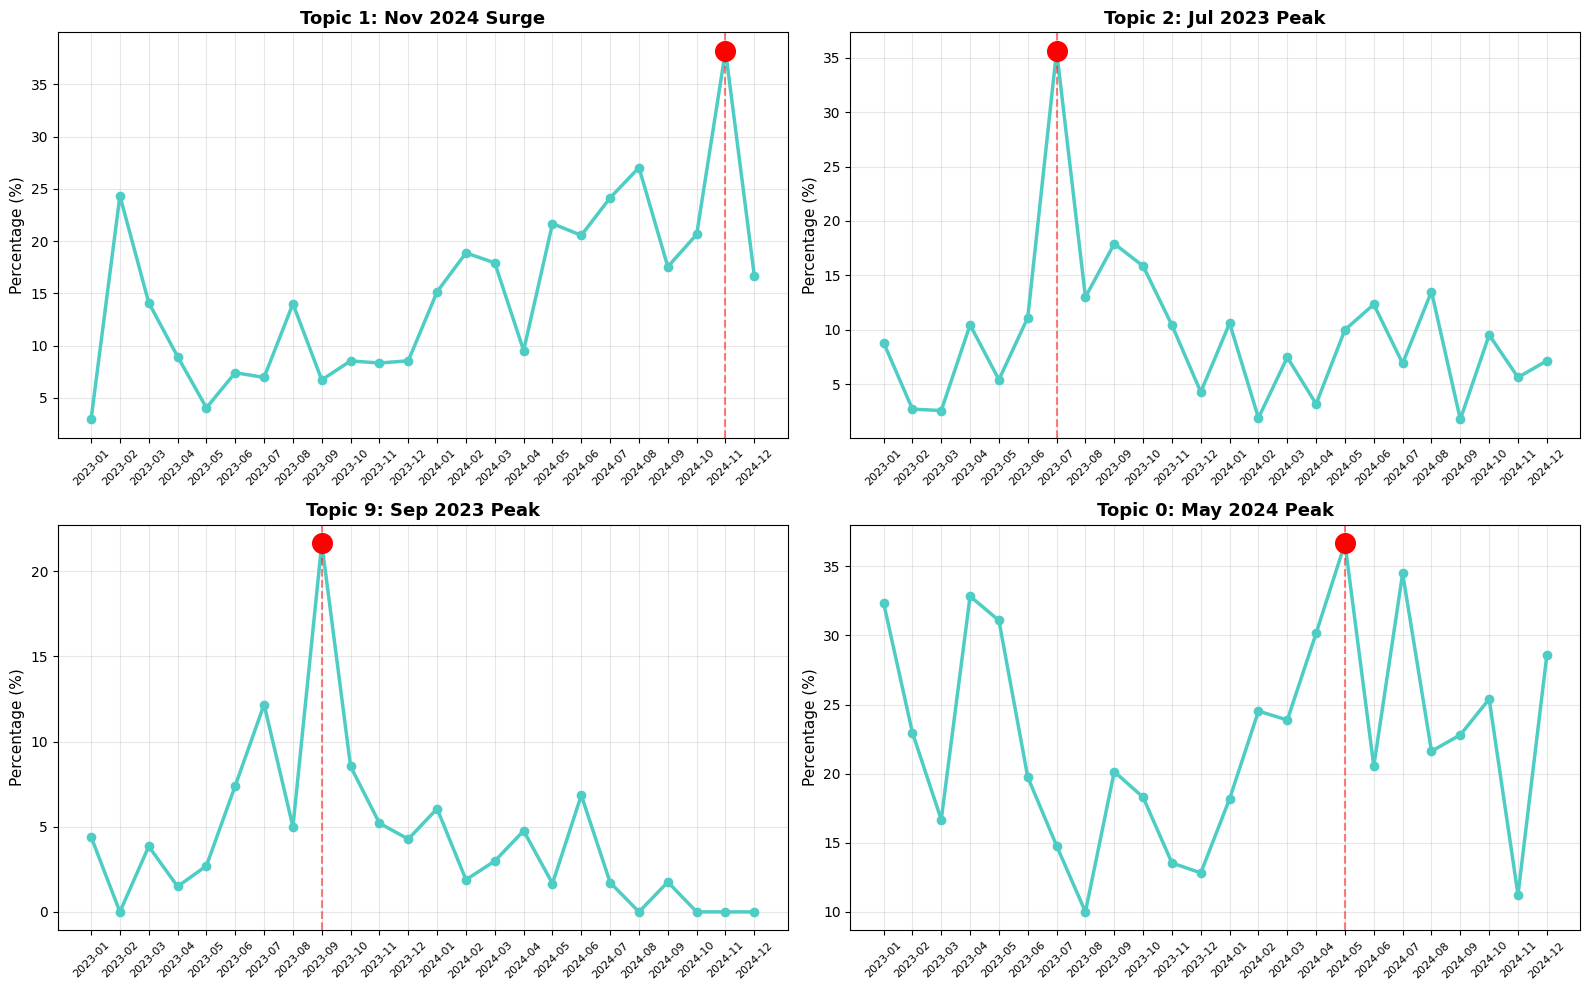


✅ Saved: uk_event_topics.png


In [ ]:
# UK 주요 급등 이벤트
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

uk_events = [
    (1, '2024-11', axes[0, 0], 'Topic 1: Nov 2024 Surge'),
    (2, '2023-07', axes[0, 1], 'Topic 2: Jul 2023 Peak'),
    (9, '2023-09', axes[1, 0], 'Topic 9: Sep 2023 Peak'),
    (0, '2024-05', axes[1, 1], 'Topic 0: May 2024 Peak'),
]

for topic, period, ax, title in uk_events:
    ax.plot(uk_temporal_pct.index.astype(str), uk_temporal_pct[topic],
            marker='o', linewidth=2.5, markersize=6, color='#4ECDC4')
    ax.set_title(title, fontsize=13, fontweight='bold')
    ax.set_ylabel('Percentage (%)', fontsize=11)
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=45, labelsize=8)

    # Peak 표시
    peak_idx = uk_temporal_pct[topic].idxmax()
    peak_val = uk_temporal_pct[topic].max()
    ax.axvline(x=str(peak_idx), color='red', linestyle='--', alpha=0.5)
    ax.scatter([str(peak_idx)], [peak_val], s=200, color='red', zorder=5)

plt.tight_layout()
plt.savefig('uk_event_topics.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Saved: uk_event_topics.png")

🔍 핵심 발견
🇰🇷 Korean: Topic 0 ↔ Topic 1 = 협력 vs 성과
Topic 0 (2024-04 Peak 61%)

키워드: 경영, 공정거래, 체결, 협약, 상생협력, 동반성장
제목: "협약 체결", "컨퍼런스 개최", "동반성장 데이"
→ "기업 간 협력/상생 협약" 📝

Topic 1 (2024-12 Peak 38%)

키워드: 글로벌, 투자, DJSI, 교육, 전문가 양성
제목: "DJSI 최고 등급", "ESG 데이터 전문가", "지속가능 공급망"
→ "ESG 성과 발표/전문화" 🏆

→ 이게 대체 효과야!

4월 = 협력/협약 시즌 (상반기 계획 발표)
12월 = 성과 평가/등급 발표 (연말 결산)


🇬🇧 UK: 완벽한 이벤트 기반 보도!
Topic 1 (2024-11, 38%): 🔴 Trump 당선 충격

키워드: Trump(21개!), climate denial, cabinet picks
제목: "Trump 2.0", "Climate denial cabinet", "Fight continues"
→ Trump 재선 후 기후정책 우려 폭발!

Topic 2 (2023-07, 36%): 🌡️ 기록적 폭염

키워드: hottest(11), record(10), heat, heatwaves, July
제목: "Era of global boiling", "Hottest day on record"
→ 2023년 여름 역대급 더위!

Topic 9 (2023-09, 22%): 🔄 Sunak의 Net Zero U-turn

키워드: Sunak(24개!), net zero, U-turn, policies
제목: "Sunak announces U-turn", "Diluting net zero targets"
→ 영국 총리의 기후정책 후퇴!

Topic 0 (2024-05, 37%): 🚗 Biden 전기차 관세

키워드: electric vehicles, Chinese, Biden, tariff
제목: "100% tariff on Chinese EV"
→ 미-중 무역전쟁 + 전기차!

In [ ]:
print("="*70)
print("🌍 CROSS-CULTURAL COMPARISON: Topic Patterns")
print("="*70)

comparison = """
┌─────────────────┬─────────────────────────┬─────────────────────────┐
│   Dimension     │    🇰🇷 KOREAN          │    🇬🇧 UK               │
├─────────────────┼─────────────────────────┼─────────────────────────┤
│ Coverage Model  │ Cyclical/Seasonal       │ Event-driven            │
│                 │ (협약→성과 cycle)       │ (Breaking news)         │
├─────────────────┼─────────────────────────┼─────────────────────────┤
│ Topic 0 Pattern │ Apr Peak: Partnerships  │ May Peak: Biden tariff  │
│                 │ Dec Low: Performance    │ Diverse coverage        │
├─────────────────┼─────────────────────────┼─────────────────────────┤
│ Topic 1 Pattern │ Dec Peak: Achievements  │ Nov Peak: Trump impact  │
│                 │ Apr Low: Quiet period   │ Political shock         │
├─────────────────┼─────────────────────────┼─────────────────────────┤
│ Major Events    │ • Topic 2 (Nov '23):    │ • Topic 2 (Jul '23):    │
│                 │   Product certifications│   Record heatwaves      │
│                 │ • Topic 3 (Dec '23):    │ • Topic 3 (Dec '23):    │
│                 │   New year CSR plans    │   COP28 conference      │
│                 │                         │ • Topic 9 (Sep '23):    │
│                 │                         │   Sunak U-turn          │
├─────────────────┼─────────────────────────┼─────────────────────────┤
│ Framing Style   │ "Announcement"          │ "Crisis/Critical"       │
│                 │ Institutional focus     │ Political focus         │
└─────────────────┴─────────────────────────┴─────────────────────────┘

KEY FINDINGS:

🇰🇷 KOREAN:
1. **Seasonal Pattern**: April = partnerships, December = results
2. **Institutional Focus**: Corporate agreements, CSR programs
3. **Predictable Cycle**: Business calendar-driven coverage
4. **Topic Substitution**: Collaboration ↔ Performance reporting

🇬🇧 UK:
1. **Event-Driven Spikes**: Political decisions, climate disasters
2. **Political Focus**: Trump, Sunak, Biden policies
3. **Reactive Coverage**: Immediate response to breaking news
4. **High Sensitivity**: Policy changes trigger massive coverage shifts
"""

print(comparison)

🌍 CROSS-CULTURAL COMPARISON: Topic Patterns

┌─────────────────┬─────────────────────────┬─────────────────────────┐
│   Dimension     │    🇰🇷 KOREAN          │    🇬🇧 UK               │
├─────────────────┼─────────────────────────┼─────────────────────────┤
│ Coverage Model  │ Cyclical/Seasonal       │ Event-driven            │
│                 │ (협약→성과 cycle)       │ (Breaking news)         │
├─────────────────┼─────────────────────────┼─────────────────────────┤
│ Topic 0 Pattern │ Apr Peak: Partnerships  │ May Peak: Biden tariff  │
│                 │ Dec Low: Performance    │ Diverse coverage        │
├─────────────────┼─────────────────────────┼─────────────────────────┤
│ Topic 1 Pattern │ Dec Peak: Achievements  │ Nov Peak: Trump impact  │
│                 │ Apr Low: Quiet period   │ Political shock         │
├─────────────────┼─────────────────────────┼─────────────────────────┤
│ Major Events    │ • Topic 2 (Nov '23):    │ • Topic 2 (Jul '23):    │
│                 │   Prod

In [ ]:
# 2023 vs 2024 비교
print("\n" + "="*70)
print("📈 EMERGING TOPICS (2024 surge)")
print("="*70)

korean_2023_avg = korean_temporal_pct.loc[korean_temporal_pct.index.astype(str) < '2024'].mean()
korean_2024_avg = korean_temporal_pct.loc[korean_temporal_pct.index.astype(str) >= '2024'].mean()
korean_growth = ((korean_2024_avg - korean_2023_avg) / korean_2023_avg.replace(0, 0.1) * 100).sort_values(ascending=False)

uk_2023_avg = uk_temporal_pct.loc[uk_temporal_pct.index.astype(str) < '2024'].mean()
uk_2024_avg = uk_temporal_pct.loc[uk_temporal_pct.index.astype(str) >= '2024'].mean()
uk_growth = ((uk_2024_avg - uk_2023_avg) / uk_2023_avg.replace(0, 0.1) * 100).sort_values(ascending=False)

print("\n🇰🇷 Korean - Topics growing in 2024:")
for topic in korean_growth.head(5).index:
    print(f"  Topic {topic}: {korean_2023_avg[topic]:.1f}% → {korean_2024_avg[topic]:.1f}% (+{korean_growth[topic]:.0f}%)")

print("\n🇬🇧 UK - Topics growing in 2024:")
for topic in uk_growth.head(5).index:
    print(f"  Topic {topic}: {uk_2023_avg[topic]:.1f}% → {uk_2024_avg[topic]:.1f}% (+{uk_growth[topic]:.0f}%)")


📈 EMERGING TOPICS (2024 surge)

🇰🇷 Korean - Topics growing in 2024:
  Topic 3: 8.3% → 11.9% (+44%)
  Topic 5: 4.6% → 5.6% (+21%)
  Topic 7: 2.1% → 2.4% (+15%)
  Topic 8: 2.2% → 2.4% (+11%)
  Topic 0: 35.7% → 38.9% (+9%)

🇬🇧 UK - Topics growing in 2024:
  Topic 1: 9.6% → 20.7% (+116%)
  Topic 6: 7.6% → 9.4% (+24%)
  Topic 0: 20.4% → 24.8% (+22%)
  Topic 5: 9.2% → 9.9% (+7%)
  Topic 8: 5.5% → 5.7% (+4%)


In [ ]:
print("="*70)
print("📈 2024 EMERGING TOPICS ANALYSIS")
print("="*70)

# Korean emerging topics
korean_emerging = [3, 5, 7, 8]

print("\n🇰🇷 KOREAN EMERGING TOPICS:")

for topic in korean_emerging:
    print(f"\n{'='*70}")
    print(f"📌 Topic {topic}")
    print('='*70)

    # 2023 vs 2024 비교
    topic_2023 = korean_df[(korean_df['topic'] == topic) &
                           (korean_df['year_month'].astype(str) < '2024')]
    topic_2024 = korean_df[(korean_df['topic'] == topic) &
                           (korean_df['year_month'].astype(str) >= '2024')]

    print(f"Articles: 2023 ({len(topic_2023)}) → 2024 ({len(topic_2024)})")

    # 2024년 샘플
    print(f"\n📰 2024 Sample Titles:")
    for i, title in enumerate(topic_2024['title'].head(5), 1):
        print(f"  {i}. {title[:75]}...")

    # 키워드 추출
    from collections import Counter
    import re

    all_titles_2024 = ' '.join(topic_2024['title'].astype(str))
    words = re.findall(r'[가-힣]{2,}', all_titles_2024)
    word_freq = Counter(words)
    stopwords = ['것으로', '있는', '했다', '밝혔다', '대한', '이번', '올해', '지난', '있다', '통해']
    filtered = [(w, c) for w, c in word_freq.most_common(30) if w not in stopwords]

    print(f"\n🔑 2024 Keywords: {', '.join([f'{w}({c})' for w, c in filtered[:10]])}")

    # ESG 분포
    esg_2023 = topic_2023['esg_category'].value_counts()
    esg_2024 = topic_2024['esg_category'].value_counts()
    print(f"\n📊 ESG Distribution:")
    print(f"  2023: {dict(esg_2023)}")
    print(f"  2024: {dict(esg_2024)}")

    # 월별 트렌드
    monthly_2024 = topic_2024.groupby('year_month').size().sort_values(ascending=False)
    print(f"\n📅 2024 Monthly Distribution (Top 5):")
    for month, count in monthly_2024.head(5).items():
        print(f"  {month}: {count} articles")

# UK emerging topics
uk_emerging = [1, 6, 0]

print("\n" + "="*70)
print("🇬🇧 UK EMERGING TOPICS:")

for topic in uk_emerging:
    print(f"\n{'='*70}")
    print(f"📌 Topic {topic}")
    print('='*70)

    topic_2023 = uk_df[(uk_df['topic'] == topic) &
                       (uk_df['year_month'].astype(str) < '2024')]
    topic_2024 = uk_df[(uk_df['topic'] == topic) &
                       (uk_df['year_month'].astype(str) >= '2024')]

    print(f"Articles: 2023 ({len(topic_2023)}) → 2024 ({len(topic_2024)})")

    print(f"\n📰 2024 Sample Titles:")
    for i, title in enumerate(topic_2024['title'].head(5), 1):
        print(f"  {i}. {title[:75]}...")

    # 키워드
    all_titles_2024 = ' '.join(topic_2024['title'].astype(str)).lower()
    words = re.findall(r'\b[a-z]{3,}\b', all_titles_2024)
    word_freq = Counter(words)
    stopwords_en = ['the', 'and', 'for', 'with', 'that', 'from', 'this', 'will',
                    'are', 'have', 'could', 'would', 'their', 'what', 'more']
    filtered = [(w, c) for w, c in word_freq.most_common(30) if w not in stopwords_en]

    print(f"\n🔑 2024 Keywords: {', '.join([f'{w}({c})' for w, c in filtered[:10]])}")

    # ESG
    esg_2023 = topic_2023['esg_category'].value_counts()
    esg_2024 = topic_2024['esg_category'].value_counts()
    print(f"\n📊 ESG Distribution:")
    print(f"  2023: {dict(esg_2023)}")
    print(f"  2024: {dict(esg_2024)}")

    # 월별
    monthly_2024 = topic_2024.groupby('year_month').size().sort_values(ascending=False)
    print(f"\n📅 2024 Monthly Distribution (Top 5):")
    for month, count in monthly_2024.head(5).items():
        print(f"  {month}: {count} articles")

📈 2024 EMERGING TOPICS ANALYSIS

🇰🇷 KOREAN EMERGING TOPICS:

📌 Topic 3
Articles: 2023 (42) → 2024 (49)

📰 2024 Sample Titles:
  1. 하나증권, 美 상장 월배당 ETF 투자 '스노우볼랩' 출시...
  2. 서울교통공사, 올 7202억원 규모 발주 계획 상반기 89% 집중...
  3. HDC현대산업개발, 설맞이 협력사 결제 대금 조기 지급...
  4. 카카오, 소상공인 톡채널에 212억원 지원 골목상권 침해 이미지 쇄신...
  5. 멀어지는 토큰증권 개화...STO 전문기업 ‘크로스체크’ 생존법 눈에띄네...

🔑 2024 Keywords: 인증(14), 획득(12), 취득(5), 경영(4), 규범준수(4), 최초(4), 출시(3), 상반기(3), 지원(3), 강화(3)

📊 ESG Distribution:
  2023: {'S': np.int64(26), 'G': np.int64(16)}
  2024: {'G': np.int64(25), 'S': np.int64(24)}

📅 2024 Monthly Distribution (Top 5):
  2024-01: 8 articles
  2024-11: 8 articles
  2024-07: 6 articles
  2024-12: 4 articles
  2024-04: 4 articles

📌 Topic 5
Articles: 2023 (25) → 2024 (23)

📰 2024 Sample Titles:
  1. KB증권, 다문화종합복지센터에 과일청세트 기부...
  2. 경기신용보증재단, 경기도 장애인 오케스트라에 1천만 원 임직원 후원금 전달...
  3. 에브리봇, 사회복지시설에 GE 비접촉 체온계 기부 "ESG경영 실천"...
  4. '동반성장 실천' 한샘 IMM희망재단, 물류협력사 자녀에게 장학금 전달...
  5. 에쓰-오일, 보육원 청소년 및 자립준비청년 지원...

🔑 2024 Keywords: 

In [ ]:
print("="*70)
print("🌍 2024 EMERGING PATTERNS COMPARISON")
print("="*70)

summary = """
┌────────────────────┬─────────────────────────┬─────────────────────────┐
│   Dimension        │    🇰🇷 KOREAN          │    🇬🇧 UK               │
├────────────────────┼─────────────────────────┼─────────────────────────┤
│ Top Growth         │ Topic 3: +44%           │ Topic 1: +116%          │
│                    │ (Certification boom)    │ (Trump effect)          │
├────────────────────┼─────────────────────────┼─────────────────────────┤
│ Emerging Theme 1   │ ESG Certification       │ Political Polarization  │
│                    │ - 인증 획득 (14회)      │ - Trump mentions (54회) │
│                    │ - 규범준수 강조         │ - Climate as politics   │
├────────────────────┼─────────────────────────┼─────────────────────────┤
│ Emerging Theme 2   │ ESG Rating Reports      │ Food System Impact      │
│                    │ - MSCI, 기준원 평가    │ - Meat production       │
│                    │ - AAA 등급 경쟁         │ - Sustainable diets     │
├────────────────────┼─────────────────────────┼─────────────────────────┤
│ Emerging Theme 3   │ Financial Performance   │ EV Practicality         │
│                    │ - 분기 실적 보도       │ - "Too expensive"       │
│                    │ - ESG-재무 연계        │ - Real-world barriers   │
├────────────────────┼─────────────────────────┼─────────────────────────┤
│ Framing Evolution  │ From Voluntary →        │ From Abstract →         │
│                    │ To Mandatory            │ To Personal Choice      │
│                    │ (제도화)                │ (정치화 + 실생활화)     │
├────────────────────┼─────────────────────────┼─────────────────────────┤
│ Key Driver         │ Regulatory compliance   │ Political elections     │
│                    │ ESG disclosure rules    │ Trump vs Biden/Harris   │
└────────────────────┴─────────────────────────┴─────────────────────────┘

KEY INSIGHTS:

🇰🇷 KOREAN 2024 TREND:
"ESG Institutionalization" (ESG의 제도화)
- Certification & compliance surge (+44%)
- Rating system establishment (+15%)
- ESG-financial performance linkage (+11%)
→ ESG becomes mandatory business practice

🇬🇧 UK 2024 TREND:
"ESG Politicization & Personalization" (정치화 + 개인화)
- Climate becomes partisan issue (+116% Trump coverage)
- New angles: Food systems (+24%)
- Practical barriers emerge (+22% EV challenges)
→ ESG moves from policy to daily life debates

CONTRAST:
Korean: "How to comply?" (어떻게 준수할까?)
UK: "Should we comply?" (준수해야 하나?)
"""

🌍 2024 EMERGING PATTERNS COMPARISON


In [ ]:
print("="*70)
print("🎨 ESG CATEGORY TEMPORAL ANALYSIS")
print("="*70)

# 1. 전체 ESG 분포 (2년 평균)
print("\n📊 Overall ESG Distribution (2023-2024)")
print("="*70)

korean_esg_overall = korean_df['esg_category'].value_counts(normalize=True) * 100
uk_esg_overall = uk_df['esg_category'].value_counts(normalize=True) * 100

print("\n🇰🇷 Korean:")
for cat, pct in korean_esg_overall.items():
    print(f"  {cat}: {pct:.1f}%")

print("\n🇬🇧 UK:")
for cat, pct in uk_esg_overall.items():
    print(f"  {cat}: {pct:.1f}%")

# 2. 시간에 따른 변화
korean_esg_temporal = korean_df.groupby(['year_month', 'esg_category']).size().unstack(fill_value=0)
uk_esg_temporal = uk_df.groupby(['year_month', 'esg_category']).size().unstack(fill_value=0)

# 비율로 변환
korean_esg_pct = korean_esg_temporal.div(korean_esg_temporal.sum(axis=1), axis=0) * 100
uk_esg_pct = uk_esg_temporal.div(uk_esg_temporal.sum(axis=1), axis=0) * 100

# 3. 2023 vs 2024 비교
korean_2023_esg = korean_esg_pct.loc[korean_esg_pct.index.astype(str) < '2024'].mean()
korean_2024_esg = korean_esg_pct.loc[korean_esg_pct.index.astype(str) >= '2024'].mean()

uk_2023_esg = uk_esg_pct.loc[uk_esg_pct.index.astype(str) < '2024'].mean()
uk_2024_esg = uk_esg_pct.loc[uk_esg_pct.index.astype(str) >= '2024'].mean()

print("\n📈 2023 vs 2024 Changes")
print("="*70)

print("\n🇰🇷 Korean:")
for cat in korean_2023_esg.index:
    change = korean_2024_esg[cat] - korean_2023_esg[cat]
    arrow = '↑' if change > 0 else '↓'
    print(f"  {cat}: {korean_2023_esg[cat]:.1f}% → {korean_2024_esg[cat]:.1f}% ({arrow}{abs(change):.1f}pp)")

print("\n🇬🇧 UK:")
for cat in uk_2023_esg.index:
    change = uk_2024_esg[cat] - uk_2023_esg[cat]
    arrow = '↑' if change > 0 else '↓'
    print(f"  {cat}: {uk_2023_esg[cat]:.1f}% → {uk_2024_esg[cat]:.1f}% ({arrow}{abs(change):.1f}pp)")

🎨 ESG CATEGORY TEMPORAL ANALYSIS

📊 Overall ESG Distribution (2023-2024)

🇰🇷 Korean:
  E: 45.3%
  G: 36.1%
  S: 18.5%

🇬🇧 UK:
  E: 92.6%
  S: 5.2%
  G: 2.2%

📈 2023 vs 2024 Changes

🇰🇷 Korean:
  E: 46.4% → 45.3% (↓1.0pp)
  G: 35.9% → 34.6% (↓1.2pp)
  S: 17.8% → 20.0% (↑2.3pp)

🇬🇧 UK:
  E: 93.1% → 91.8% (↓1.4pp)
  G: 1.8% → 2.8% (↑0.9pp)
  S: 5.0% → 5.5% (↑0.5pp)


In [ ]:
print("\n" + "="*70)
print("🔍 WHY SUCH DIFFERENT ESG PRIORITIES?")
print("="*70)

analysis = """
🇬🇧 UK (92.6% Environmental):

WHY SO CLIMATE-FOCUSED?
1. Geographic vulnerability
   - Guardian은 환경 전문 언론사
   - 기후위기가 정치 핵심 이슈

2. Political battleground
   - Net zero targets
   - Fossil fuel phase-out
   - COP conferences

3. Media selection bias
   - Guardian = progressive, climate-focused
   - BBC도 환경 보도 많음

4. Historical context
   - Industrial revolution 원조
   - 탄소 책임 의식

🇰🇷 Korean (45% E, 36% G, 19% S):

WHY MORE BALANCED?
1. Corporate governance focus
   - 재벌 지배구조 이슈
   - 주주총회, 이사회 개혁
   - ESG 평가 = 지배구조 중심

2. Social responsibility tradition
   - 기업 사회공헌 문화
   - 동반성장, 상생협력
   - 지역사회 기여

3. Recent environmental awakening
   - 기후위기 인식 증가 중
   - 탄소중립 정책 시작
   - 재생에너지 전환

4. ESG disclosure requirements
   - 2025년부터 의무화
   - E/S/G 균형있게 보고 필요
"""

print(analysis)


🔍 WHY SUCH DIFFERENT ESG PRIORITIES?

🇬🇧 UK (92.6% Environmental):

WHY SO CLIMATE-FOCUSED?
1. Geographic vulnerability
   - Guardian은 환경 전문 언론사
   - 기후위기가 정치 핵심 이슈
   
2. Political battleground
   - Net zero targets
   - Fossil fuel phase-out
   - COP conferences
   
3. Media selection bias
   - Guardian = progressive, climate-focused
   - BBC도 환경 보도 많음
   
4. Historical context
   - Industrial revolution 원조
   - 탄소 책임 의식

🇰🇷 Korean (45% E, 36% G, 19% S):

WHY MORE BALANCED?
1. Corporate governance focus
   - 재벌 지배구조 이슈
   - 주주총회, 이사회 개혁
   - ESG 평가 = 지배구조 중심
   
2. Social responsibility tradition
   - 기업 사회공헌 문화
   - 동반성장, 상생협력
   - 지역사회 기여
   
3. Recent environmental awakening
   - 기후위기 인식 증가 중
   - 탄소중립 정책 시작
   - 재생에너지 전환
   
4. ESG disclosure requirements
   - 2025년부터 의무화
   - E/S/G 균형있게 보고 필요

